<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/Home_Work_Dogs_Cats_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [1]:
# import package
import pandas as pd 
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt


In [2]:
def get_data_set(filepath):
  imgs=[]
  labels = []
  print("start reading files...")
  for f in os.listdir(filepath):
    if not (f.endswith("pmg")):
      if f.startswith("dog") :
        labels.append(1)
      else :
        labels.append(0)

      print("Reading files....")
      imgg = Image.open(filepath+"/"+f)
      imgg = imgg.resize((250,250))
      img = np.asarray(imgg)
      imgs.append(img)
  print("Reading finished...")
  return np.asarray(imgs),labels
filepath = ("/content/drive/MyDrive/Data")
imgs,labels = get_data_set(filepath)

start reading files...
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Reading files....
Readi

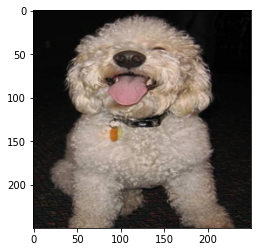

In [3]:
## Plot photo
rndm = np.random.randint(0,59)
plt.imshow(imgs[rndm])

## Split Data

In [4]:
# set the random seed
import tensorflow as tf
tf.random.set_seed(42)
# Split Data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(imgs,labels,test_size = 0.33)
xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)



## Create First Model

In [5]:
# Import Libray
from keras.layers import Flatten
from keras import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras.losses
import keras.optimizers

In [37]:
# Set the random seed
tf.random.set_seed(42)

# Create the model

model1 = Sequential()

model1.add(Convolution2D(200,input_shape=(250,250,3),kernel_size=8,activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Flatten())
model1.add(Dense(250,activation = 'relu'))
model1.add(Dense(2,activation='sigmoid'))

ResourceExhaustedError: ignored

In [ ]:
# Compile the model
model1.compile(optimizer =tf.keras.optimizers.Adam(learning_rate = 0.001),loss = "SparseCategoricalCrossentropy",metrics=["accuracy"] )

In [34]:
model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=32)

Epoch 1/50
2/2 [==============================] - 1s 254ms/step - loss: 628973.1250 - accuracy: 0.4750 - val_loss: 36713.0625 - val_accuracy: 0.4500
Epoch 2/50
2/2 [==============================] - 0s 118ms/step - loss: 35003.7617 - accuracy: 0.5750 - val_loss: 55058.3047 - val_accuracy: 0.5500
Epoch 3/50
2/2 [==============================] - 0s 122ms/step - loss: 66216.5078 - accuracy: 0.4750 - val_loss: 8291.1553 - val_accuracy: 0.4500
Epoch 4/50
2/2 [==============================] - 0s 121ms/step - loss: 7633.1523 - accuracy: 0.5250 - val_loss: 8200.8975 - val_accuracy: 0.4500
Epoch 5/50
2/2 [==============================] - 0s 117ms/step - loss: 6332.5171 - accuracy: 0.5250 - val_loss: 3121.0442 - val_accuracy: 0.5500
Epoch 6/50
2/2 [==============================] - 0s 120ms/step - loss: 4524.7783 - accuracy: 0.4750 - val_loss: 2417.9324 - val_accuracy: 0.5500
Epoch 7/50
2/2 [==============================] - 0s 121ms/step - loss: 2517.4062 - accuracy: 0.5000 - val_loss: 2039.

In [9]:
## Model Summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 243, 243, 10)      1930      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 100)               1600100   
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,602,232
Trainable params: 1,602,232
Non-trainable params: 0
______________________________________________